<a href="https://colab.research.google.com/github/Ari-Net/ISPPR-2/blob/master/lab_netudykhata_update.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Підключаємо необхідні бібліотеки

In [76]:
import tensorflow as tf
!pip install tensorflow-addons
import tensorflow_addons as tfa
from tensorflow.keras.layers import Dense, Activation, BatchNormalization, Dropout, Flatten, Input
from tensorflow.keras import Model, Sequential

# Завантажуємо набір зображень "Omniglot" (використовуємо два алфавіти - корейський, кирилицю)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Підготовка даних до навчання та розбиття на начальну і перевірочну множини

In [3]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, validation_split=0.2)#створюємо батчі(пакети) даних тензорного зображення зі збільшенням даних в реальному часі

train = datagen.flow_from_directory('/content/drive/MyDrive/dataset', class_mode='categorical', batch_size=16, target_size=(64, 64),
                                    color_mode='grayscale', subset='training')

validation = datagen.flow_from_directory('/content/drive/MyDrive/dataset', class_mode='categorical', batch_size=16, target_size=(64, 64),
                                          color_mode='grayscale', subset='validation')

Found 1168 images belonging to 73 classes.
Found 292 images belonging to 73 classes.


# Модель з єдиним вихідним шаром

In [79]:
model = Sequential()
model.add(Input((64, 64, 1)))
model.add(Flatten())
model.add(Dense(73, kernel_initializer=tf.keras.initializers.RandomNormal(), activation='softmax'))
model.summary()
model.compile(optimizer='sgd', 
              loss='categorical_crossentropy', 
              metrics=[tf.keras.metrics.AUC(name='AUC'), tf.keras.metrics.CategoricalAccuracy(name='Accuracy'),tfa.metrics.F1Score(num_classes=73,name='f1')])
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15),
             tf.keras.callbacks.ModelCheckpoint(filepath='model_1.h5'),
             tf.keras.callbacks.TensorBoard('./logs/model_1', update_freq=1)]             
model.fit(train, validation_data=validation, callbacks=callbacks, epochs=200, verbose=2)

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_20 (Flatten)         (None, 4096)              0         
_________________________________________________________________
dense_44 (Dense)             (None, 73)                299081    
Total params: 299,081
Trainable params: 299,081
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
73/73 - 4s - loss: 6.4622 - AUC: 0.5054 - Accuracy: 0.0163 - f1: 0.0151 - val_loss: 5.7793 - val_AUC: 0.5157 - val_Accuracy: 0.0240 - val_f1: 0.0077
Epoch 2/200
73/73 - 2s - loss: 5.9479 - AUC: 0.5569 - Accuracy: 0.0171 - f1: 0.0178 - val_loss: 5.3937 - val_AUC: 0.5657 - val_Accuracy: 0.0240 - val_f1: 0.0116
Epoch 3/200
73/73 - 2s - loss: 5.3819 - AUC: 0.6129 - Accuracy: 0.0334 - f1: 0.0335 - val_loss: 5.3322 - val_AUC: 0.5632 - val_Accuracy: 0.0274 - val_f1: 0.0110
Epoch 4/200
73/73 - 2s - l

# Глибока модель з двома шарами ReLU

In [81]:
model = Sequential()
model.add(Input((64, 64, 1)))
model.add(Flatten())
model.add(Dense(128, kernel_initializer=tf.keras.initializers.RandomNormal(), activation='relu'))
model.add(Dense(96, kernel_initializer=tf.keras.initializers.RandomNormal(), activation='relu'))
model.add(Dense(73, kernel_initializer=tf.keras.initializers.RandomNormal(), activation='softmax'))
model.summary()

model.compile(optimizer='sgd', 
              loss='categorical_crossentropy',
              metrics=[tf.keras.metrics.AUC(name='AUC'), tf.keras.metrics.CategoricalAccuracy(name='Accuracy'),tfa.metrics.F1Score(num_classes=73,name='f1')])
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15),
             tf.keras.callbacks.ModelCheckpoint(filepath='model_2.h5'),
             tf.keras.callbacks.TensorBoard('./logs/model_2', update_freq=1)]             
model.fit(train, validation_data=validation, callbacks=callbacks, epochs=200, verbose=2)

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_22 (Flatten)         (None, 4096)              0         
_________________________________________________________________
dense_48 (Dense)             (None, 128)               524416    
_________________________________________________________________
dense_49 (Dense)             (None, 96)                12384     
_________________________________________________________________
dense_50 (Dense)             (None, 73)                7081      
Total params: 543,881
Trainable params: 543,881
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
73/73 - 3s - loss: 4.3161 - AUC: 0.5005 - Accuracy: 0.0120 - f1: 0.0069 - val_loss: 4.2890 - val_AUC: 0.5204 - val_Accuracy: 0.0103 - val_f1: 9.6696e-04
Epoch 2/200
73/73 - 2s - loss: 4.2797 - AUC: 0.5269 - Accuracy: 0.0146 - f1: 0.0

# Ініціалізація ваг методом He та використання оптимізатора Adam

In [82]:
model = Sequential()
model.add(Input((64, 64, 1)))
model.add(Flatten())
model.add(Dense(128, kernel_initializer=tf.keras.initializers.HeNormal(), activation='relu'))
model.add(Dense(96, kernel_initializer=tf.keras.initializers.HeNormal(), activation='relu'))
model.add(Dense(73, activation='softmax'))
model.summary()

model.compile(optimizer=tf.keras.optimizers.Adam(0.01), 
              loss='categorical_crossentropy', 
              metrics=[tf.keras.metrics.AUC(name='AUC'), tf.keras.metrics.CategoricalAccuracy(name='Accuracy'),tfa.metrics.F1Score(num_classes=73,name='f1')])
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15),
             tf.keras.callbacks.ModelCheckpoint(filepath='model_3.h5'),
             tf.keras.callbacks.TensorBoard('./logs/model_3', update_freq=1)]             
model.fit(train, validation_data=validation, callbacks=callbacks, epochs=200, verbose=2)

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_23 (Flatten)         (None, 4096)              0         
_________________________________________________________________
dense_51 (Dense)             (None, 128)               524416    
_________________________________________________________________
dense_52 (Dense)             (None, 96)                12384     
_________________________________________________________________
dense_53 (Dense)             (None, 73)                7081      
Total params: 543,881
Trainable params: 543,881
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
73/73 - 3s - loss: 9.9699 - AUC: 0.4957 - Accuracy: 0.0094 - f1: 0.0041 - val_loss: 4.2919 - val_AUC: 0.5000 - val_Accuracy: 0.0137 - val_f1: 3.7023e-04
Epoch 2/200
73/73 - 2s - loss: 4.2984 - AUC: 0.4954 - Accuracy: 0.0077 - f1: 8.5

# Навчання не відбувається. Застосуємо функцію активації LeakyReLU

In [83]:
model = Sequential()
model.add(Input((64, 64, 1)))
model.add(Flatten())
model.add(Dense(128, kernel_initializer=tf.keras.initializers.HeNormal(), activation=tf.keras.layers.ReLU(negative_slope=0.05)))
model.add(Dense(96, kernel_initializer=tf.keras.initializers.HeNormal(),  activation=tf.keras.layers.ReLU(negative_slope=0.05)))
model.add(Dense(73, activation='softmax'))
model.summary()

model.compile(optimizer=tf.keras.optimizers.Adam(0.01), 
              loss='categorical_crossentropy', 
              metrics=[tf.keras.metrics.AUC(name='AUC'), tf.keras.metrics.CategoricalAccuracy(name='Accuracy'),tfa.metrics.F1Score(num_classes=73,name='f1')])
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15),
             tf.keras.callbacks.ModelCheckpoint(filepath='model_3.h5'),
             tf.keras.callbacks.TensorBoard('./logs/model_3', update_freq=1)]             
model.fit(train, validation_data=validation, callbacks=callbacks, epochs=200, verbose=2)

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_24 (Flatten)         (None, 4096)              0         
_________________________________________________________________
dense_54 (Dense)             (None, 128)               524416    
_________________________________________________________________
dense_55 (Dense)             (None, 96)                12384     
_________________________________________________________________
dense_56 (Dense)             (None, 73)                7081      
Total params: 543,881
Trainable params: 543,881
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
73/73 - 4s - loss: 15.9378 - AUC: 0.4924 - Accuracy: 0.0103 - f1: 0.0078 - val_loss: 4.5934 - val_AUC: 0.5008 - val_Accuracy: 0.0137 - val_f1: 3.7023e-04
Epoch 2/200
73/73 - 2s - loss: 4.5163 - AUC: 0.4815 - Accuracy: 0.0111 - f1: 0.

# Використаємо менший коефіцієнт навчання

In [84]:
model = Sequential()
model.add(Input((64, 64, 1)))
model.add(Flatten())
model.add(Dense(128, kernel_initializer=tf.keras.initializers.HeNormal(), activation=tf.keras.layers.ReLU(negative_slope=0.05)))
model.add(Dense(96, kernel_initializer=tf.keras.initializers.HeNormal(),  activation=tf.keras.layers.ReLU(negative_slope=0.05)))
model.add(Dense(73, activation='softmax'))
model.summary()

model.compile(optimizer=tf.keras.optimizers.Adam(0.001), 
              loss='categorical_crossentropy', 
              metrics=[tf.keras.metrics.AUC(name='AUC'), tf.keras.metrics.CategoricalAccuracy(name='Accuracy'),tfa.metrics.F1Score(num_classes=73,name='f1')])
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15),
             tf.keras.callbacks.ModelCheckpoint(filepath='model_4.h5'),
             tf.keras.callbacks.TensorBoard('./logs/model_4', update_freq=1)]             
model.fit(train, validation_data=validation, callbacks=callbacks, epochs=200, verbose=2)

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_25 (Flatten)         (None, 4096)              0         
_________________________________________________________________
dense_57 (Dense)             (None, 128)               524416    
_________________________________________________________________
dense_58 (Dense)             (None, 96)                12384     
_________________________________________________________________
dense_59 (Dense)             (None, 73)                7081      
Total params: 543,881
Trainable params: 543,881
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
73/73 - 3s - loss: 4.5972 - AUC: 0.4782 - Accuracy: 0.0051 - f1: 0.0016 - val_loss: 4.3022 - val_AUC: 0.5016 - val_Accuracy: 0.0137 - val_f1: 3.9706e-04
Epoch 2/200
73/73 - 2s - loss: 4.3263 - AUC: 0.4929 - Accuracy: 0.0111 - f1: 0.0

# Застосуємо L2 регуляризацію

In [85]:
model = Sequential()
model.add(Input((64, 64, 1)))
model.add(Flatten())
model.add(Dense(128, kernel_initializer=tf.keras.initializers.HeNormal(),
                activation=tf.keras.layers.ReLU(negative_slope=0.05)))
model.add(Dense(96, kernel_initializer=tf.keras.initializers.HeNormal(),
                activation=tf.keras.layers.ReLU(negative_slope=0.05)))
model.add(Dense(73, kernel_regularizer=tf.keras.regularizers.l2(), activation='softmax'))
model.summary()

model.compile(optimizer=tf.keras.optimizers.Adam(0.001), 
              loss='categorical_crossentropy', 
              metrics=[tf.keras.metrics.AUC(name='AUC'), tf.keras.metrics.CategoricalAccuracy(name='Accuracy'),tfa.metrics.F1Score(num_classes=73,name='f1')])
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15),
             tf.keras.callbacks.ModelCheckpoint(filepath='model_5.h5'),
             tf.keras.callbacks.TensorBoard('./logs/model_5', update_freq=1)]             
model.fit(train, validation_data=validation, callbacks=callbacks, epochs=200, verbose=2)

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_26 (Flatten)         (None, 4096)              0         
_________________________________________________________________
dense_60 (Dense)             (None, 128)               524416    
_________________________________________________________________
dense_61 (Dense)             (None, 96)                12384     
_________________________________________________________________
dense_62 (Dense)             (None, 73)                7081      
Total params: 543,881
Trainable params: 543,881
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
73/73 - 4s - loss: 5.3205 - AUC: 0.4960 - Accuracy: 0.0188 - f1: 0.0102 - val_loss: 4.9851 - val_AUC: 0.5080 - val_Accuracy: 0.0137 - val_f1: 4.8491e-04
Epoch 2/200
73/73 - 2s - loss: 4.9091 - AUC: 0.5028 - Accuracy: 0.0137 - f1: 0.0

# Застосуємо пакетну нормалізацію

In [86]:
model = Sequential()
model.add(Input((64, 64, 1)))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(128, kernel_initializer=tf.keras.initializers.HeNormal(), activation=tf.keras.layers.ReLU(negative_slope=0.05)))
model.add(BatchNormalization())
model.add(Dense(96, kernel_initializer=tf.keras.initializers.HeNormal(), activation=tf.keras.layers.ReLU(negative_slope=0.05)))
model.add(BatchNormalization())
model.add(Dense(73, activation='softmax'))
model.summary()

model.compile(optimizer=tf.keras.optimizers.Adam(0.001), 
              loss='categorical_crossentropy', 
              metrics=[tf.keras.metrics.AUC(name='AUC'), tf.keras.metrics.CategoricalAccuracy(name='Accuracy'),tfa.metrics.F1Score(num_classes=73,name='f1')])
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15),
             tf.keras.callbacks.ModelCheckpoint(filepath='model_6.h5'),
             tf.keras.callbacks.TensorBoard('./logs/model_6', update_freq=1)]             
model.fit(train, validation_data=validation, callbacks=callbacks, epochs=200, verbose=2)

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_27 (Flatten)         (None, 4096)              0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 4096)              16384     
_________________________________________________________________
dense_63 (Dense)             (None, 128)               524416    
_________________________________________________________________
batch_normalization_4 (Batch (None, 128)               512       
_________________________________________________________________
dense_64 (Dense)             (None, 96)                12384     
_________________________________________________________________
batch_normalization_5 (Batch (None, 96)                384       
_________________________________________________________________
dense_65 (Dense)             (None, 73)              

# Застосуємо Dropout

In [87]:
model = Sequential()
model.add(Input((64, 64, 1)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(128, kernel_initializer=tf.keras.initializers.HeNormal(), activation=tf.keras.layers.ReLU(negative_slope=0.05)))
model.add(Dropout(0.2))
model.add(Dense(96, kernel_initializer=tf.keras.initializers.HeNormal(), activation=tf.keras.layers.ReLU(negative_slope=0.05)))
model.add(Dense(73, activation='softmax'))
model.summary()

model.compile(optimizer=tf.keras.optimizers.Adam(0.001), 
              loss='categorical_crossentropy', 
              metrics=[tf.keras.metrics.AUC(name='AUC'), tf.keras.metrics.CategoricalAccuracy(name='Accuracy'),tfa.metrics.F1Score(num_classes=73,name='f1')])
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15),
             tf.keras.callbacks.ModelCheckpoint(filepath='model_7.h5'),
             tf.keras.callbacks.TensorBoard('./logs/model_7', update_freq=1)]             
model.fit(train, validation_data=validation, callbacks=callbacks, epochs=200, verbose=2)

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_28 (Flatten)         (None, 4096)              0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 4096)              0         
_________________________________________________________________
dense_66 (Dense)             (None, 128)               524416    
_________________________________________________________________
dropout_13 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_67 (Dense)             (None, 96)                12384     
_________________________________________________________________
dense_68 (Dense)             (None, 73)                7081      
Total params: 543,881
Trainable params: 543,881
Non-trainable params: 0
_______________________________________________

# Розпізнаємо нові зображення

In [96]:
import glob
import matplotlib.pyplot as plt
import numpy as np


model = tf.keras.models.load_model('model_1.h5', custom_objects={'ReLU': tf.keras.layers.ReLU()})

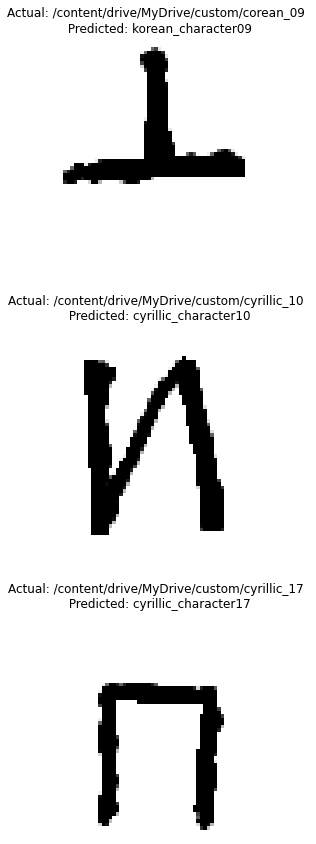

In [97]:
images = glob.glob('/content/drive/MyDrive/custom/*')
class_names = list(train.class_indices.keys())
fig, axes = plt.subplots(len(images), 1, figsize=(4,15))
for path, ax in zip(images, axes):
    image = tf.keras.preprocessing.image.load_img(path, color_mode='grayscale', target_size=(64, 64))
    ax.imshow(image, cmap='gray')
    image_arr = tf.keras.preprocessing.image.img_to_array(image)
    image_arr /= 255.
    pred = model.predict(np.array([image_arr]))
    actual = path.split("\\")[-1][:-4]
    title = f'Actual: {actual} \n Predicted: {class_names[np.argmax(pred)]}'
    ax.set_title(title)
    ax.set_axis_off()

# Додаємо графіки

In [91]:
import datetime
from tensorboard.plugins.hparams import api as hp

In [92]:
path_graph = "/content/logs/"

In [93]:
!tensorboard dev upload --logdir /content/logs/ \
  --name "Arina Omniglot graphs" \
  --description "Training results from Omniglot" \
  --one_shot

2021-04-16 13:07:18.584355: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
Data for the "text" plugin is now uploaded to TensorBoard.dev! Note that uploaded data is public. If you do not want to upload data for this plugin, use the "--plugins" command line argument.

New experiment created. View your TensorBoard at: https://tensorboard.dev/experiment/WBiqkrSxRUyEUBMqL1T3WA/

[2021-04-16T13:07:20] Started scanning logdir.
E0416 13:07:26.146464 140177683433344 uploader.py:1114] Attempted to re-upload existing blob.  Skipping.
E0416 13:07:32.714855 140177683433344 uploader.py:1114] Attempted to re-upload existing blob.  Skipping.
E0416 13:07:41.406785 140177683433344 uploader.py:1114] Attempted to re-upload existing blob.  Skipping.
E0416 13:08:02.308295 140177683433344 uploader.py:1114] Attempted to re-upload existing blob.  Skipping.
E0416 13:08:03.307589 140177683433344 uploader.py:1114] Attempted to re-upload exist